In [10]:
# tools
import pandas as pd
from utilsforecast.plotting import plot_series

# forecast
from mlforecast import MLForecast

# features
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals

# model
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# data

## data read

In [2]:
train = pd.read_csv('https://auto-arima-results.s3.amazonaws.com/M4-Hourly.csv')
test = pd.read_csv('https://auto-arima-results.s3.amazonaws.com/M4-Hourly-test.csv')

In [4]:
print(train.head())
print()
print(train.shape)
print()
print(train["unique_id"].value_counts())

  unique_id  ds      y
0        H1   1  605.0
1        H1   2  586.0
2        H1   3  586.0
3        H1   4  559.0
4        H1   5  511.0

(353500, 3)

unique_id
H286    960
H283    960
H290    960
H289    960
H288    960
       ... 
H163    700
H164    700
H165    700
H166    700
H99     700
Name: count, Length: 414, dtype: int64


In [5]:
print(test.head())
print()
print(test.shape)
print()
print(test["unique_id"].value_counts())

  unique_id   ds      y
0        H1  701  619.0
1        H1  702  565.0
2        H1  703  532.0
3        H1  704  495.0
4        H1  705  481.0

(19872, 3)

unique_id
H1      48
H344    48
H353    48
H352    48
H351    48
        ..
H220    48
H22     48
H219    48
H218    48
H99     48
Name: count, Length: 414, dtype: int64


## data filter

In [6]:
n_series = 8
uids = train["unique_id"].unique()[:n_series]
train = train.query("unique_id in @uids")
test = test.query("unique_id in @uids")

In [7]:
print(train.head())
print()
print(train.shape)
print()
print(train["unique_id"].value_counts())

  unique_id  ds      y
0        H1   1  605.0
1        H1   2  586.0
2        H1   3  586.0
3        H1   4  559.0
4        H1   5  511.0

(5600, 3)

unique_id
H1      700
H10     700
H100    700
H101    700
H102    700
H103    700
H104    700
H105    700
Name: count, dtype: int64


In [8]:
print(test.head())
print()
print(test.shape)
print()
print(test["unique_id"].value_counts())

  unique_id   ds      y
0        H1  701  619.0
1        H1  702  565.0
2        H1  703  532.0
3        H1  704  495.0
4        H1  705  481.0

(384, 3)

unique_id
H1      48
H10     48
H100    48
H101    48
H102    48
H103    48
H104    48
H105    48
Name: count, dtype: int64


## data plot

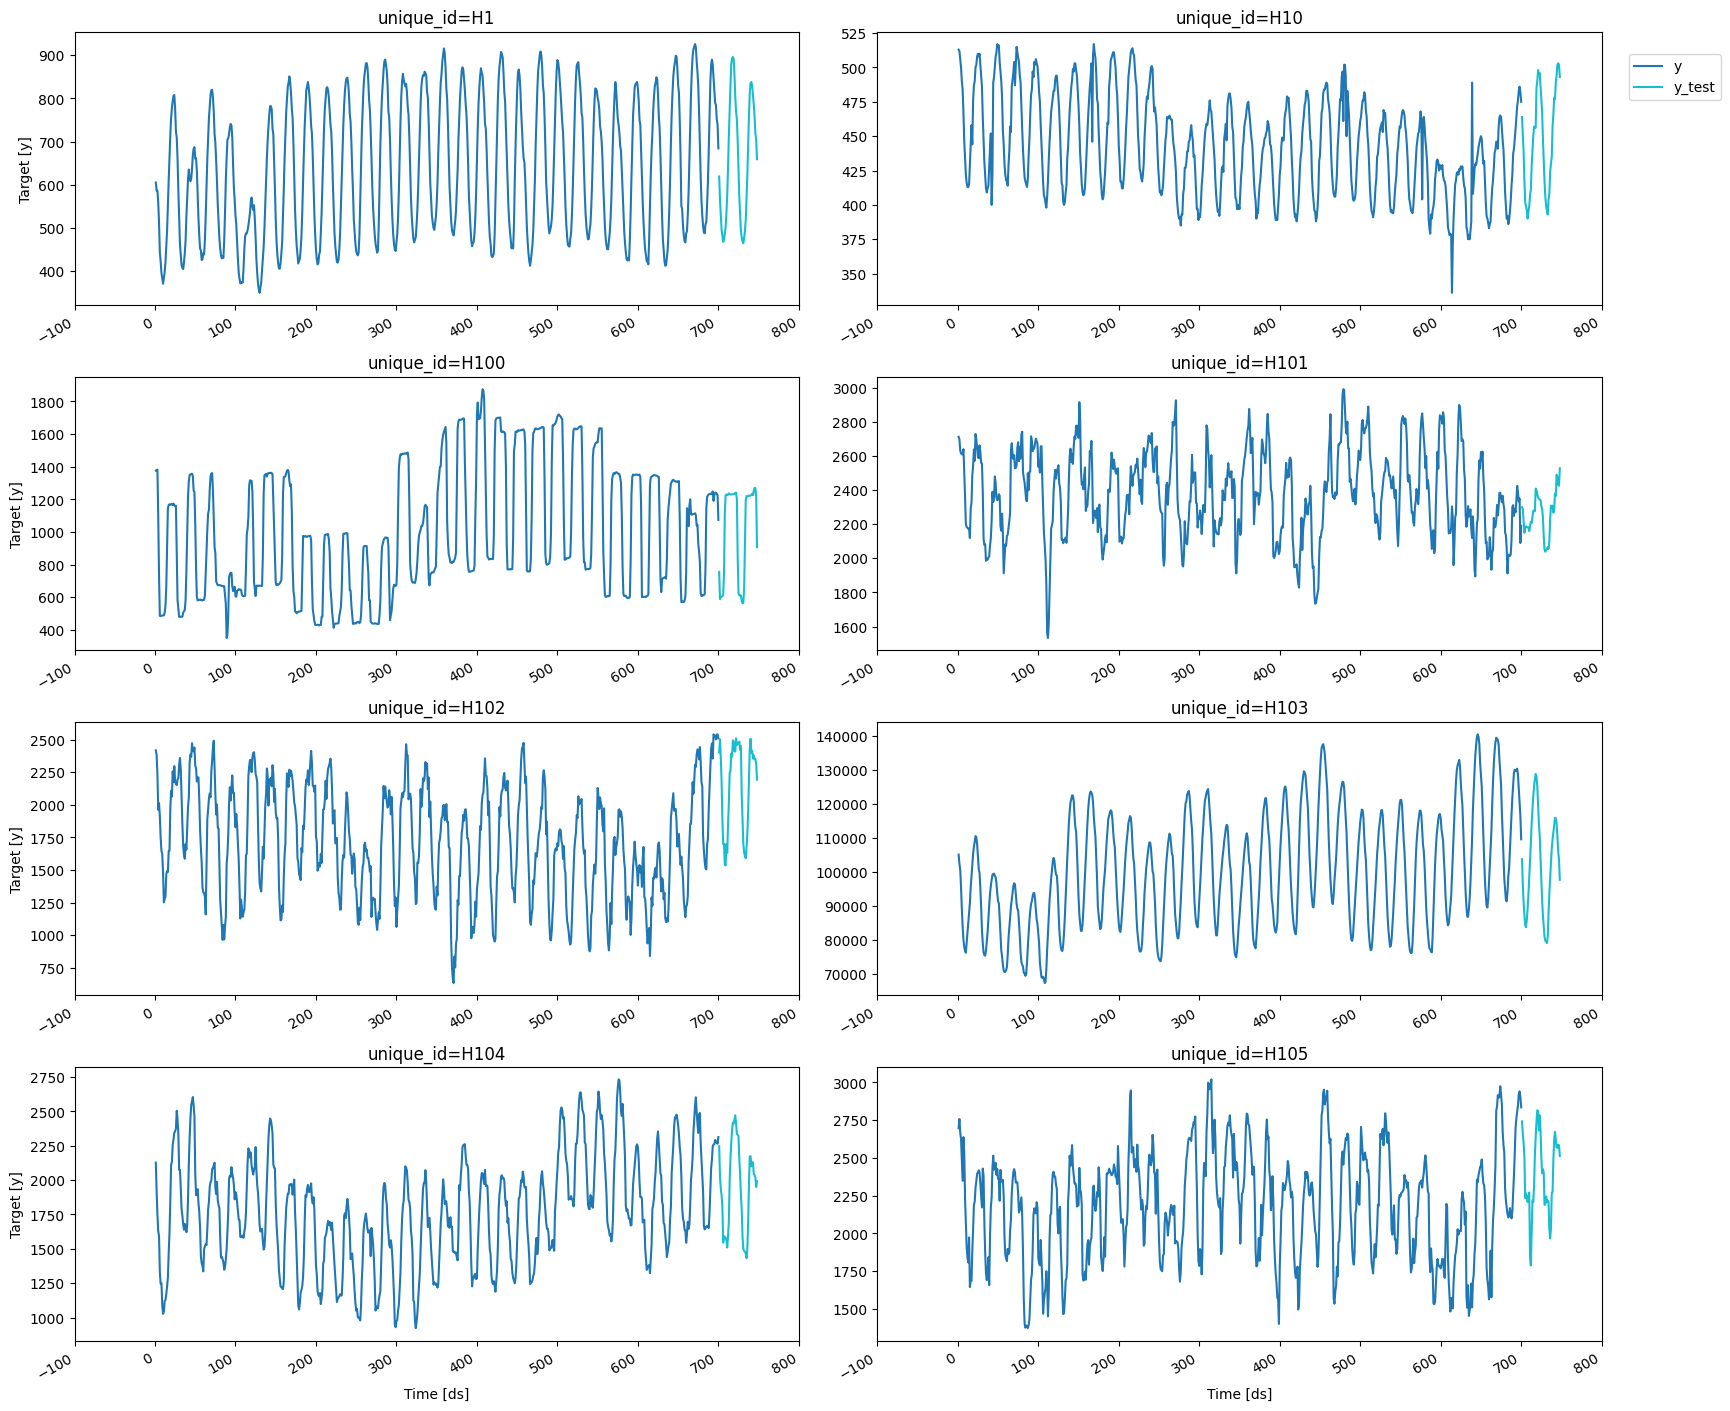

In [9]:
fig = plot_series(
    train,
    test.rename(columns = {"y": "y_test"}),
    models = ["y_test"],
    plot_random = False,
)
fig

# models

In [11]:
mlf = MLForecast(
    models = [
        Ridge(),
        Lasso(),
        LinearRegression(),
        KNeighborsRegressor(),
        MLPRegressor(random_state = 0),
    ],
    freq = 1,
    target_transforms = [Differences([1])],
    lags = [24 * (i+1) for i in range(7)],
)

# training

In [13]:
mlf.fit(
    train,
    prediction_intervals = PredictionIntervals(n_windows = 10, h = 48),
)

MLForecast(models=[Ridge, Lasso, LinearRegression, KNeighborsRegressor, MLPRegressor], freq=1, lag_features=['lag24', 'lag48', 'lag72', 'lag96', 'lag120', 'lag144', 'lag168'], date_features=[], num_threads=1)

# forecasting

In [14]:
forecasts = mlf.predict(48, level = [50, 80, 95])
forecasts.head()

,unique_id,ds,Ridge,Lasso,LinearRegression,KNeighborsRegressor,MLPRegressor,Ridge-lo-95,Ridge-lo-80,Ridge-lo-50,Ridge-hi-50,Ridge-hi-80,Ridge-hi-95,Lasso-lo-95,Lasso-lo-80,Lasso-lo-50,Lasso-hi-50,Lasso-hi-80,Lasso-hi-95,LinearRegression-lo-95,LinearRegression-lo-80,LinearRegression-lo-50,LinearRegression-hi-50,LinearRegression-hi-80,LinearRegression-hi-95,KNeighborsRegressor-lo-95,KNeighborsRegressor-lo-80,KNeighborsRegressor-lo-50,KNeighborsRegressor-hi-50,KNeighborsRegressor-hi-80,KNeighborsRegressor-hi-95,MLPRegressor-lo-95,MLPRegressor-lo-80,MLPRegressor-lo-50,MLPRegressor-hi-50,MLPRegressor-hi-80,MLPRegressor-hi-95
0,H1,701,612.418170,612.418079,612.418170,615.2,612.651532,590.473256,594.326570,603.409944,621.426397,630.509771,634.363085,590.473639,594.326589,603.409901,621.426258,630.509570,634.362520,590.473255,594.326570,603.409944,621.426397,630.509771,634.363086,599.090,603.20,609.45,620.95,627.20,631.310,584.736193,591.084898,597.462107,627.840957,634.218166,640.566870
1,H1,702,552.309298,552.308073,552.309298,551.6,548.791801,498.721501,518.433843,532.710850,571.907747,586.184753,605.897095,498.720851,518.432979,532.709700,571.906446,586.183167,605.895295,498.721500,518.433843,532.710851,571.907746,586.184753,605.897097,505.675,534.04,535.85,567.35,569.16,597.525,497.308756,500.417799,515.452396,582.131207,597.165804,600.274847
2,H1,703,494.943384,494.943367,494.943384,509.6,490.226796,448.253304,463.266064,475.006125,514.880643,526.620704,541.633464,448.254153,463.266587,475.006535,514.880199,526.620146,541.632580,448.253303,463.266064,475.006125,514.880643,526.620704,541.633465,475.020,488.28,492.70,526.50,530.92,544.180,424.587658,436.042788,448.682502,531.771091,544.410804,555.865935
3,H1,704,462.815779,462.815363,462.815779,474.6,459.619069,409.975219,422.243593,436.128272,489.503287,503.387966,515.656340,409.975594,422.243767,436.128297,489.502429,503.386959,515.655133,409.975218,422.243594,436.128272,489.503287,503.387965,515.656341,423.700,438.94,451.80,497.40,510.26,525.500,379.291083,392.580306,413.353178,505.884959,526.657832,539.947054
4,H1,705,440.141034,440.140586,440.141034,451.6,438.091712,377.999588,392.523016,413.474795,466.807273,487.759052,502.282480,378.000120,392.523446,413.474932,466.806240,487.757726,502.281052,377.999587,392.523017,413.474796,466.807272,487.759050,502.282481,399.255,414.24,427.40,475.80,488.96,503.945,348.618034,362.503767,386.303325,489.880099,513.679657,527.565389


# evaluate

In [21]:
test = test.merge(forecasts, how = "left", on = ["unique_id", "ds"])

# plot prediction intervals

## KNeighborsRegressor

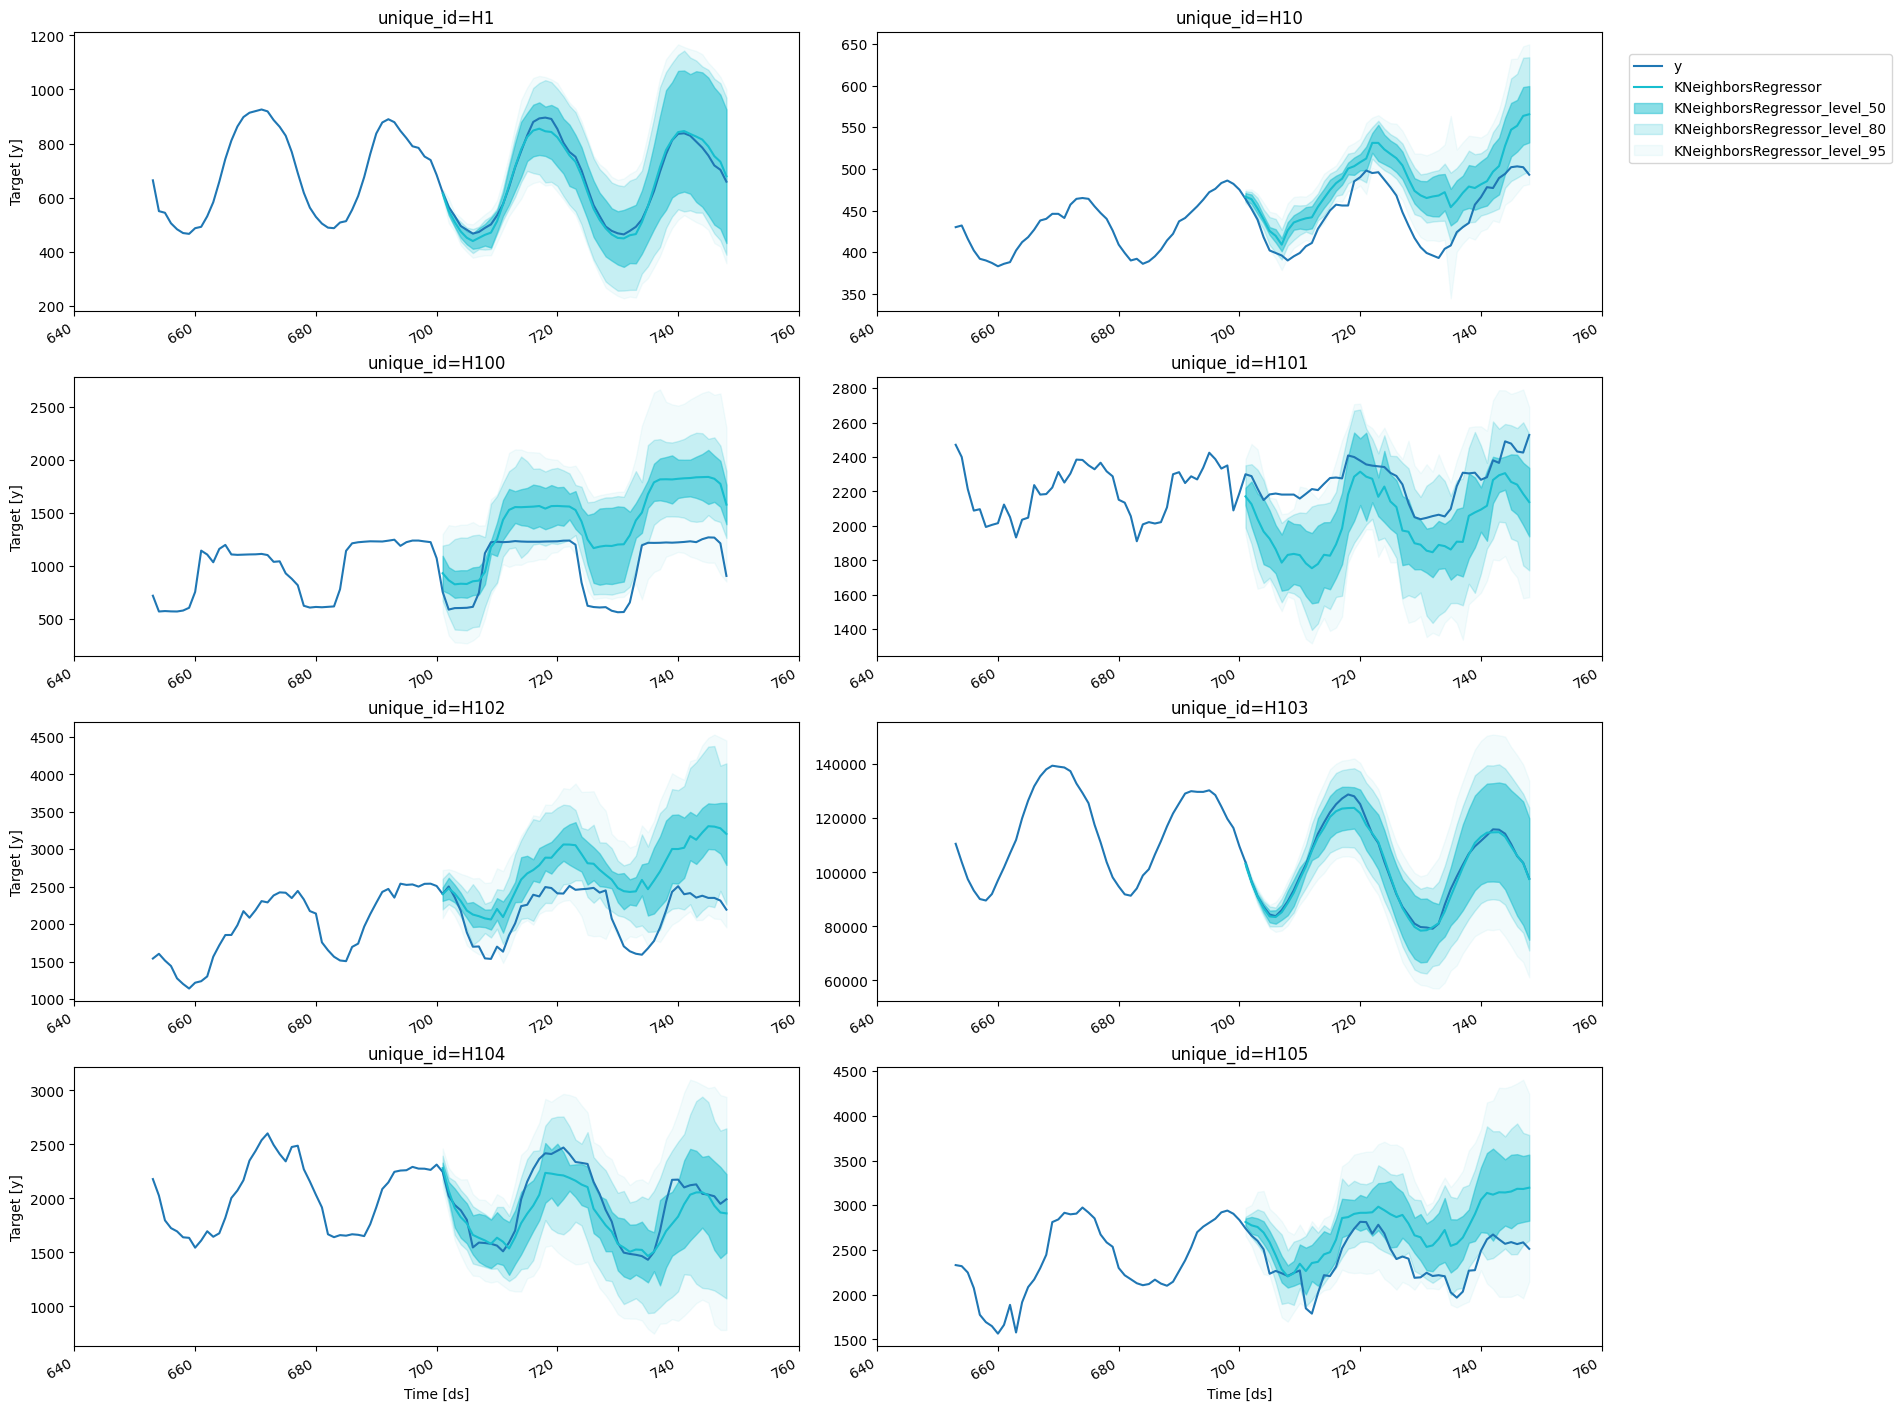

In [16]:
fig = plot_series(
    train,
    test,
    plot_random = False,
    models = ["KNeighborsRegressor"],
    level = [50, 80, 95],
    max_insample_length = 48,
)
fig

## Lasso

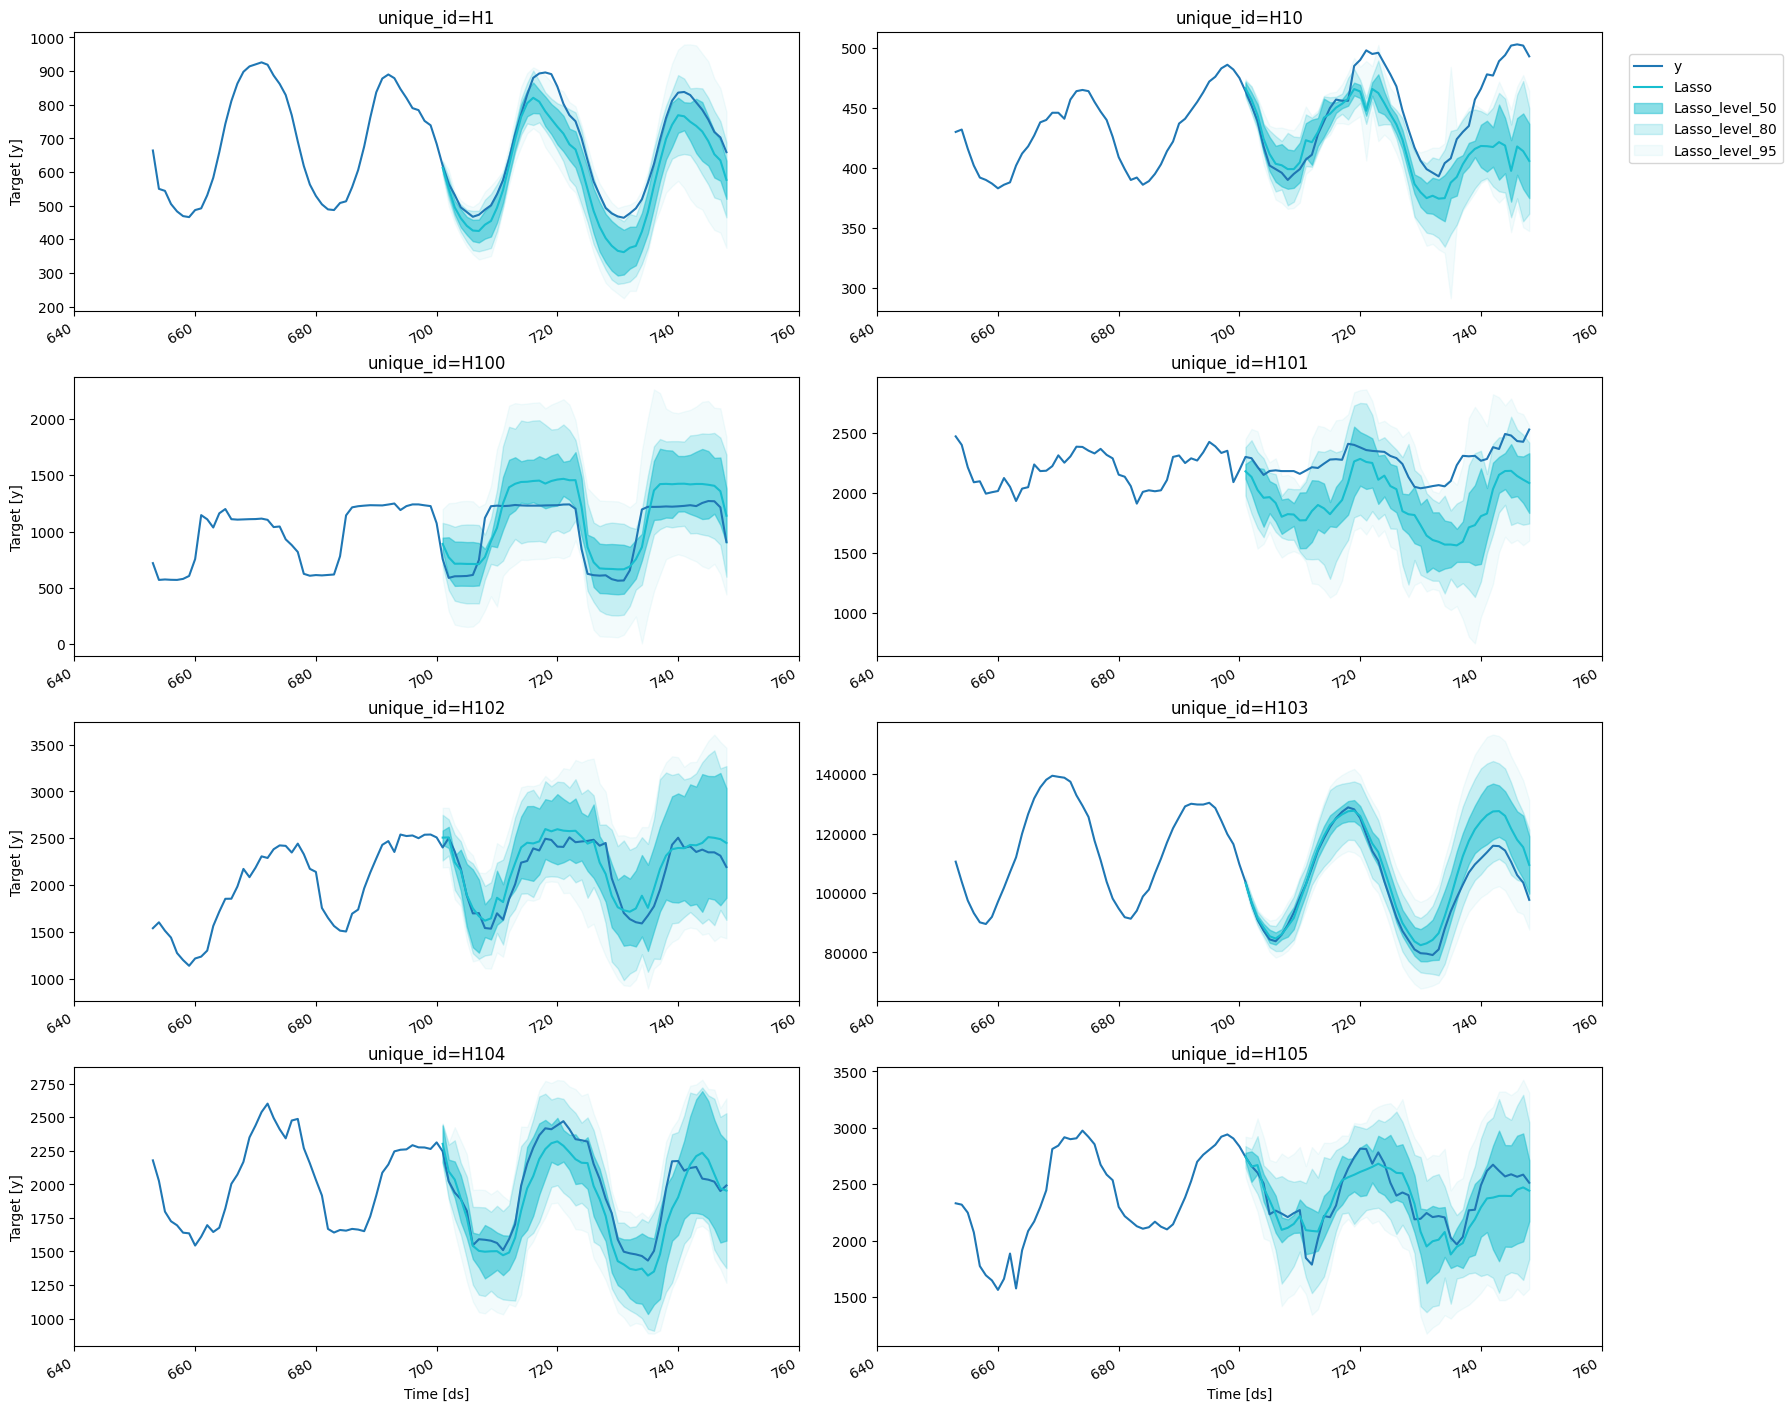

In [17]:
fig = plot_series(
    train,
    test,
    plot_random = False,
    models = ["Lasso"],
    level = [50, 80, 95],
    max_insample_length = 48,
)
fig

## LinearRegression

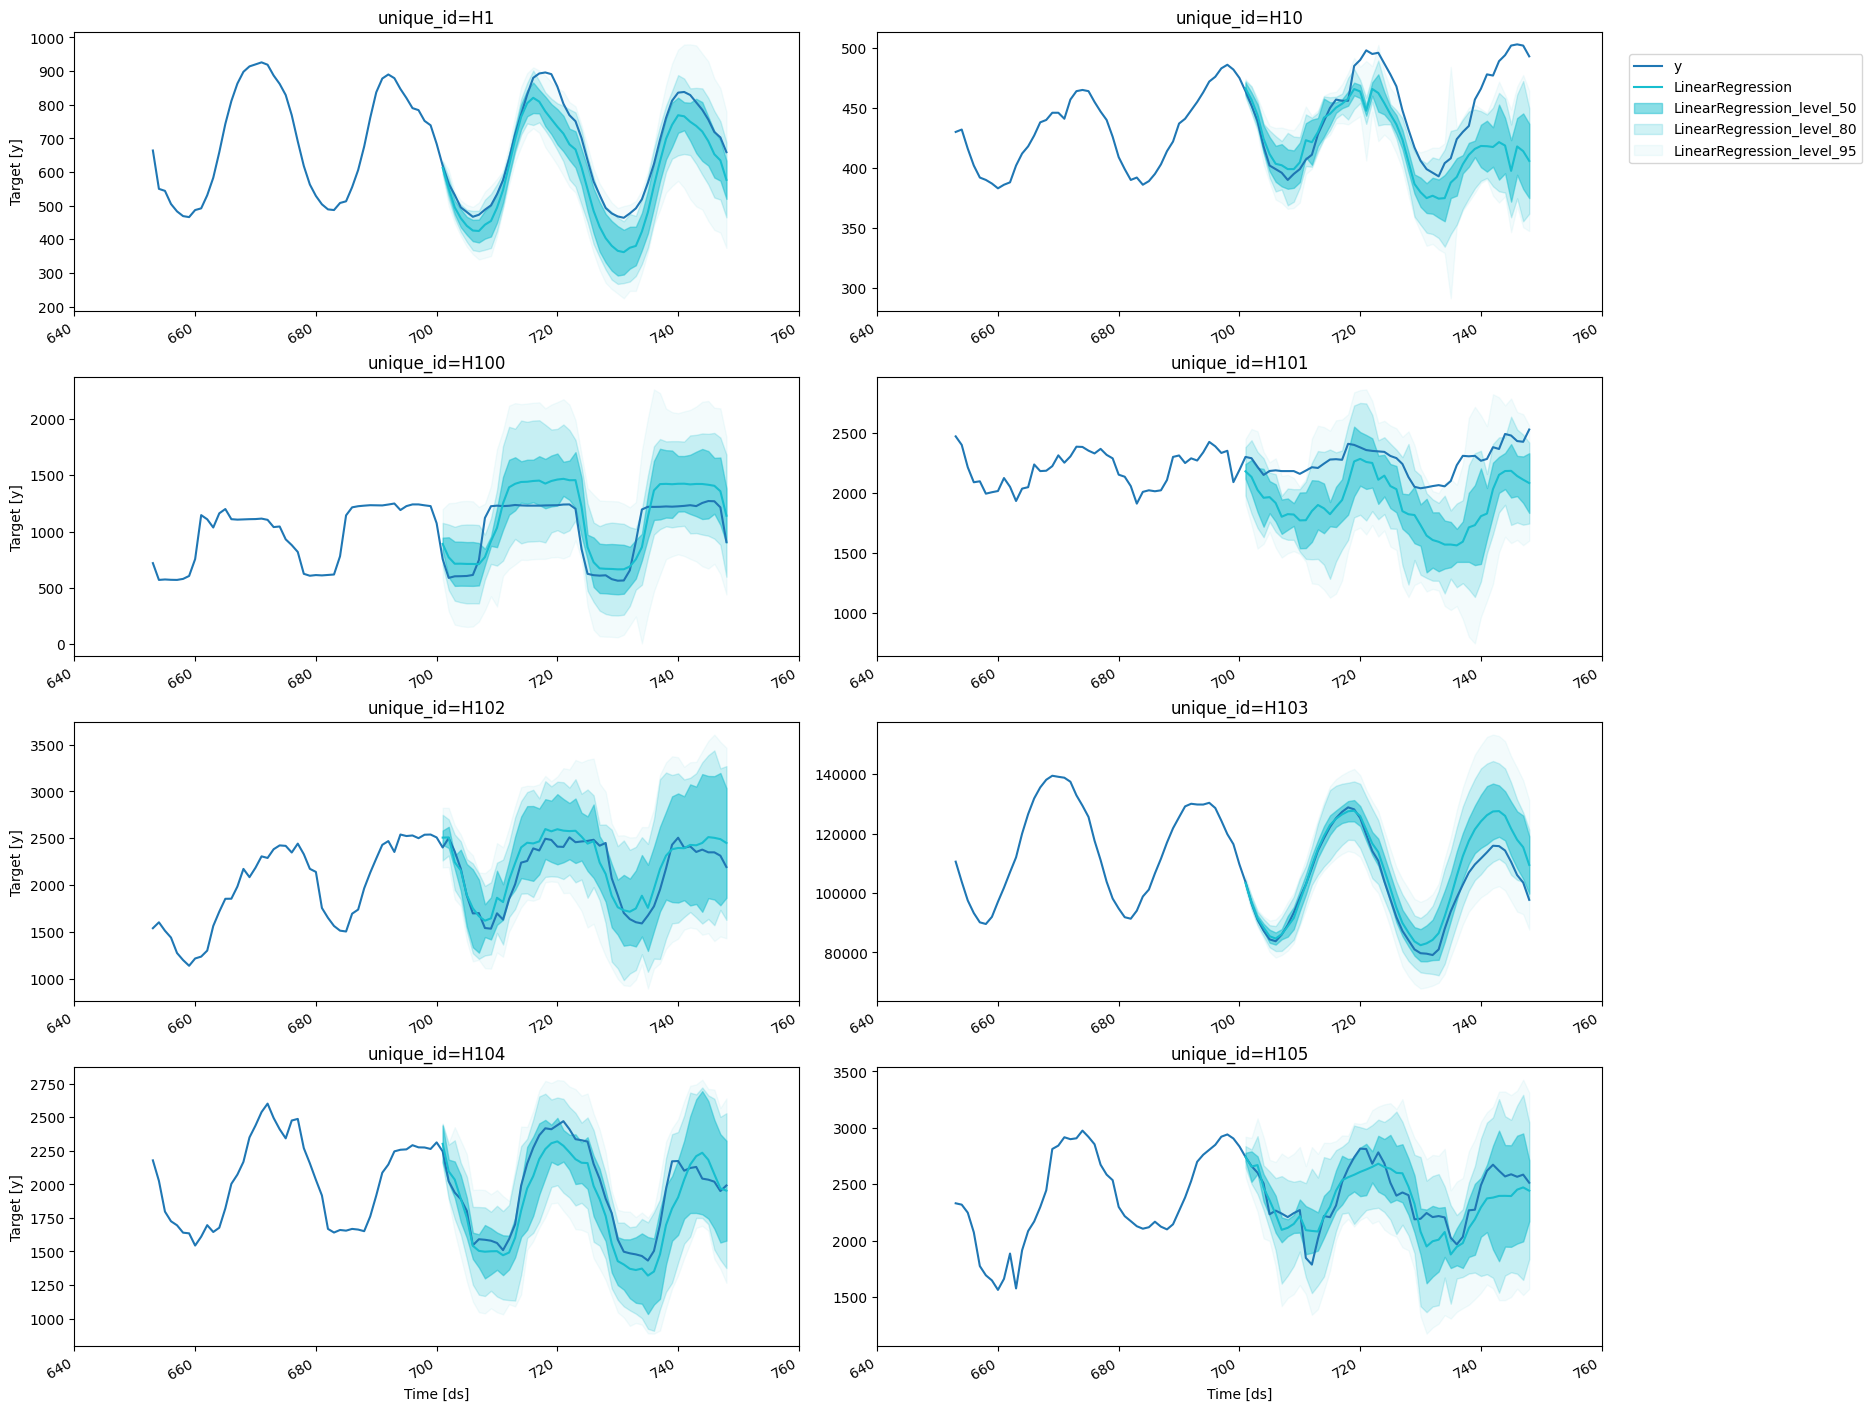

In [18]:
fig = plot_series(
    train,
    test,
    plot_random = False,
    models = ["LinearRegression"],
    level = [50, 80, 95],
    max_insample_length = 48,
)
fig

## MLPRegressor

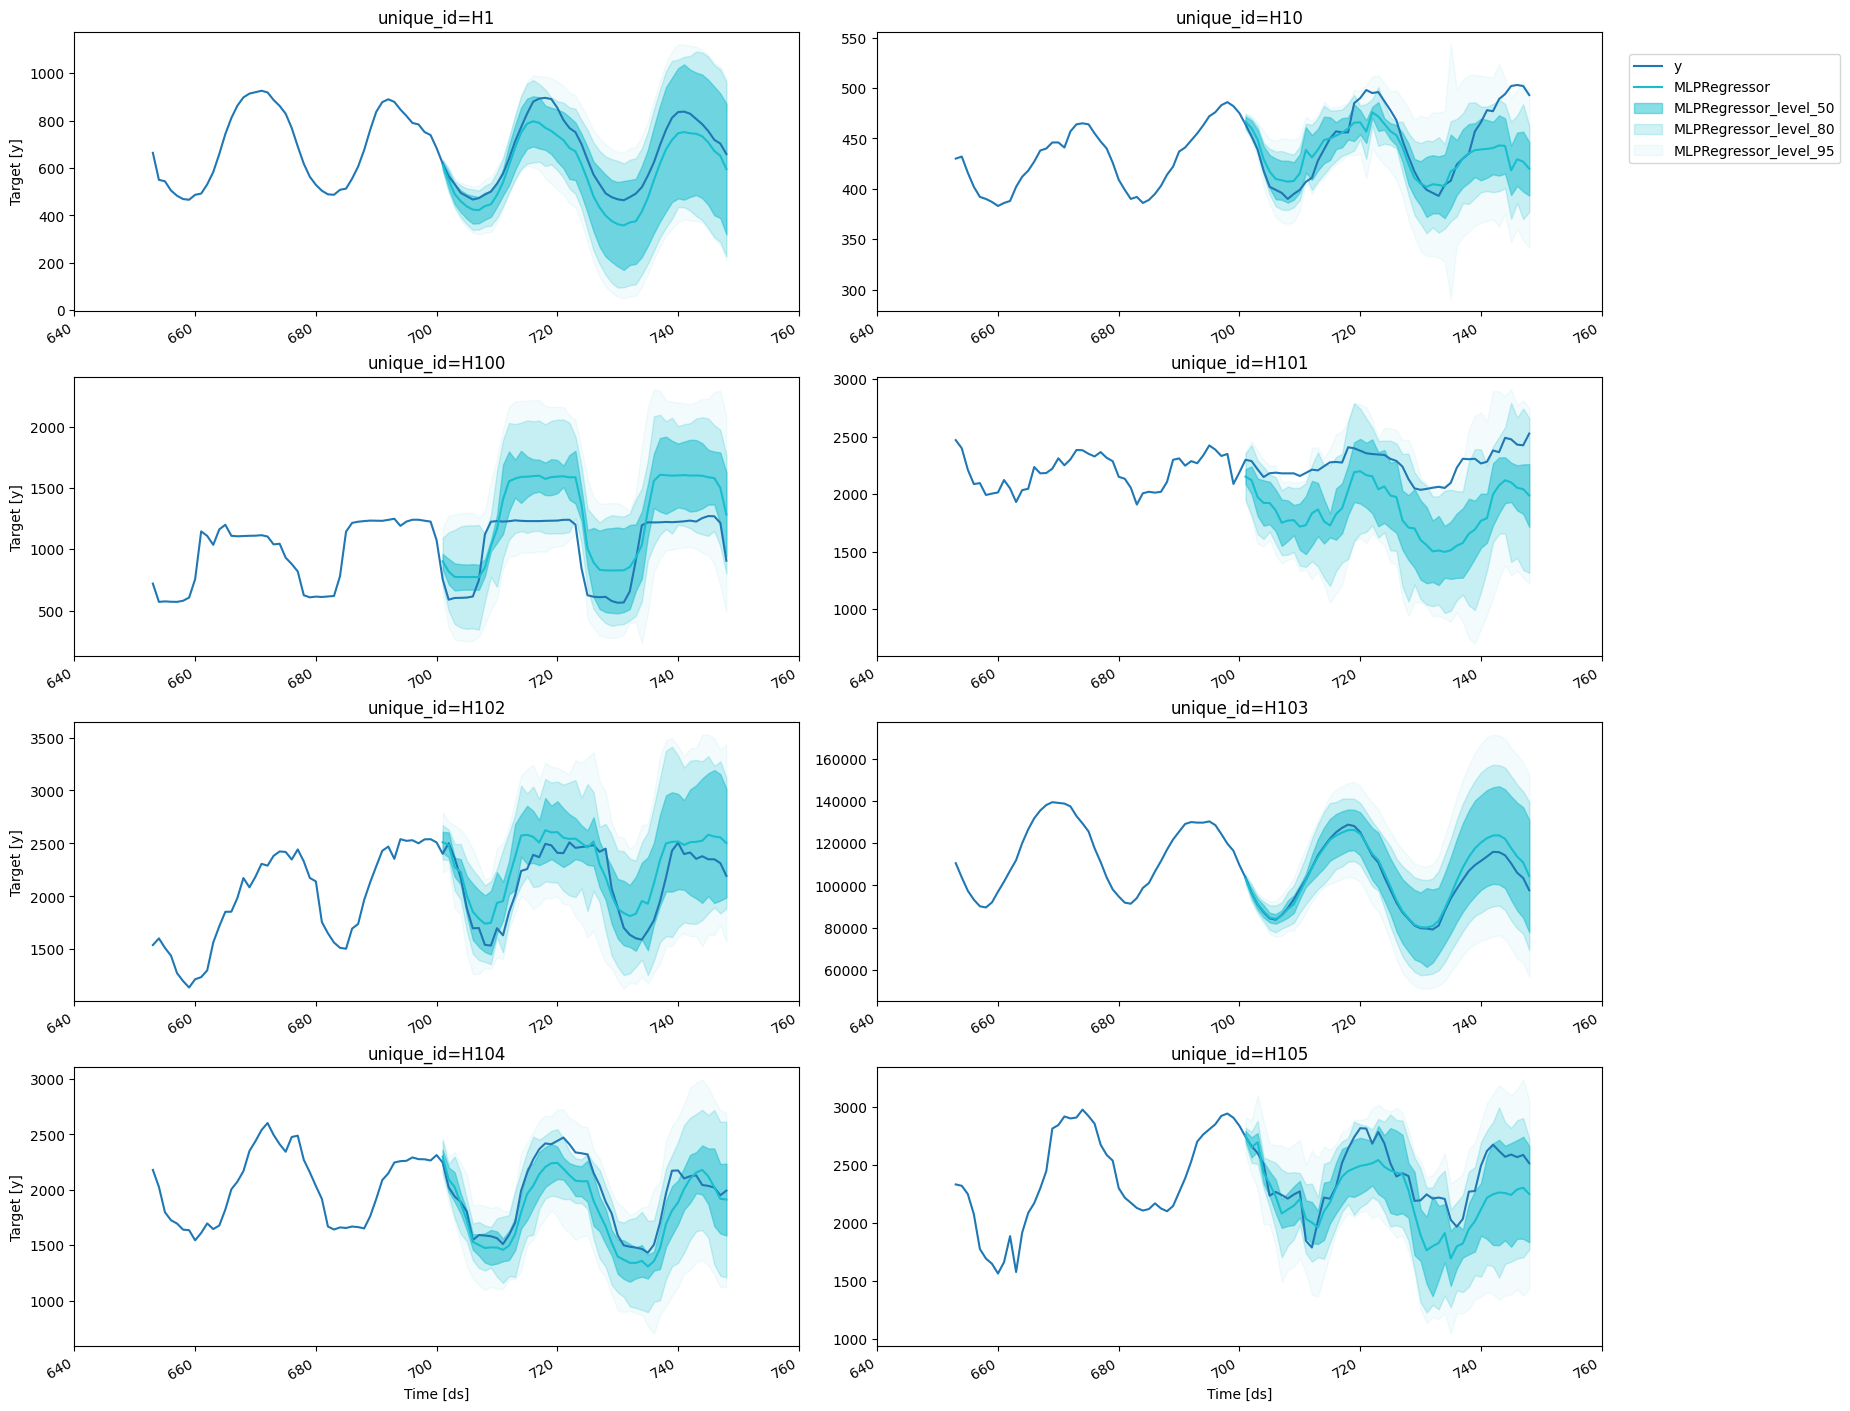

In [19]:
fig = plot_series(
    train,
    test,
    plot_random = False,
    models = ["MLPRegressor"],
    level = [50, 80, 95],
    max_insample_length = 48,
)
fig

## Ridge

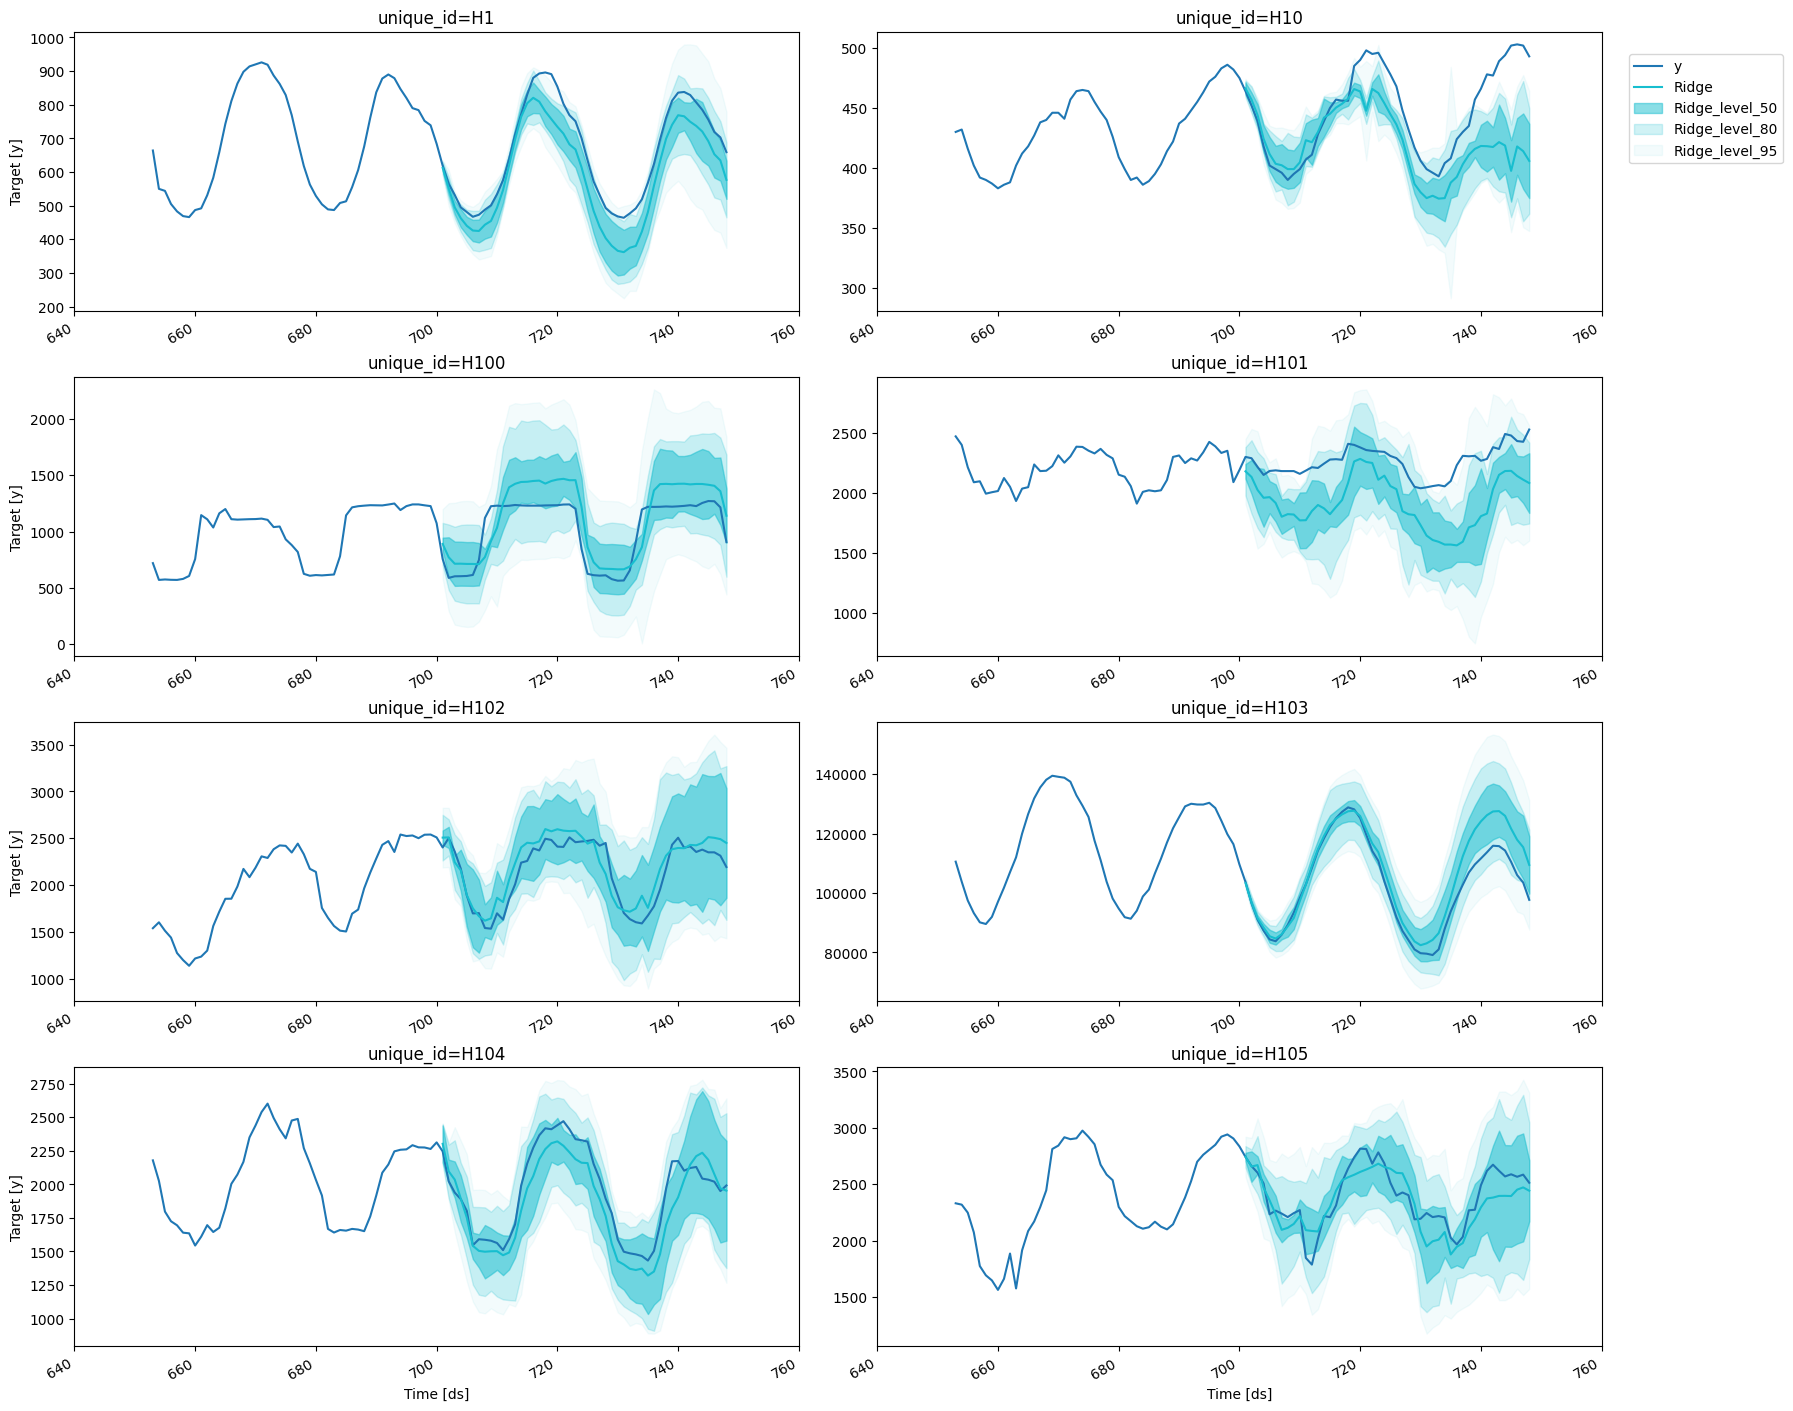

In [20]:
fig = plot_series(
    train, 
    test,
    plot_random = False,
    models = ["Ridge"],
    level = [50, 80, 95],
    max_insample_length = 48,
)
fig